In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw

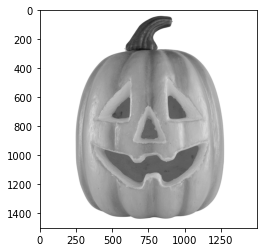

In [2]:
img = cv.imread("pumpkin.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img, cmap ="gray")

In [3]:
 # Алгоритм быстрого преобразования Фурье для получения частотного распределения
f = np.fft.fft2(img)
 # Вызов функции fftshift () для перехода в среднее положение
fshift = np.fft.fftshift(f) #spectrum after fourier transformation and centralization , fft_src
fg = np.log(1+np.abs(fshift)) #spectrum after log transformation
phase_spectrum = np.angle(fshift)

In [14]:
def spectr(src):
    f = np.fft.fft2(src)
    fshift = np.fft.fftshift(f)
    fg = np.log(1+np.abs(fshift))
    return fshift, fg

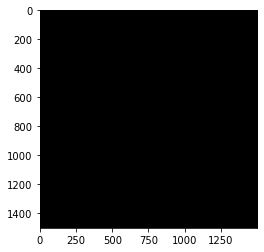

In [5]:
plt.imshow(np.abs(fshift), cmap='gray')

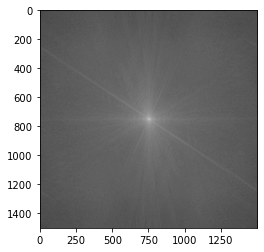

In [7]:
plt.imshow(fg,cmap='gray')

In [8]:
#https://russianblogs.com/article/55301445806/#

In [9]:
def inv_fourier_trans(src):
    """
    inverse fourier transformation
        src: spectrums
        ifft_img: the image after inverse fourier transformation
    """
    inv_ctr_img = np.fft.ifftshift(src)
    ifft_img = np.fft.ifft2(inv_ctr_img)

    return ifft_img


def idea_low_pass_filter(source, radius=5):
    """
    LPF
        source: source image
        radius: size for low pass filter
    """
    # get the paras
    filter_radius = radius
    img = source

    # set paras for filter
    height, weight = img.shape
    center_h = int(height / 2)
    center_w = int(weight / 2)

    # initialize filter
    low_pass_filter = np.zeros_like(img)

    # set the low pass area
    for i in range(height):
        for j in range(weight):
            dist_from_center = np.sqrt(np.power((i - center_h), 2) + np.power((j - center_w), 2))
            if dist_from_center < radius:
                low_pass_filter[i][j] = 1

    # filter the image
    filtered_img = np.multiply(img, low_pass_filter)

    return filtered_img


img_path = "powerarmor.jpg"
src = np.array(Image.open(img_path).convert("L"))

In [10]:
def idea_high_pass_filter(img, radius=5):
    """
    HPF
        source: source image
        radius: size for High pass filter
    """
    # get the paras
    filter_radius = radius
    #img = source

    # set paras for filter
    height, weight = img.shape
    center_h = int(height / 2)
    center_w = int(weight / 2)

    # initialize filter
    high_pass_filter = np.ones_like(img)

    # set the high pass area
    for i in range(height):
        for j in range(weight):
            dist_from_center = np.sqrt(np.power((i - center_h), 2) + np.power((j - center_w), 2))

            if dist_from_center < radius:
                high_pass_filter[i][j] = 0

    # filter the image
    filtered_img = np.multiply(img, high_pass_filter)

    return filtered_img

In [11]:
img_path = "powerarmor.jpg"
src = np.array(Image.open(img_path).convert("L"))

In [12]:
imgH1 = inv_fourier_trans(idea_low_pass_filter(fshift, 70))
imgH2 = inv_fourier_trans(idea_high_pass_filter(fshift,30))

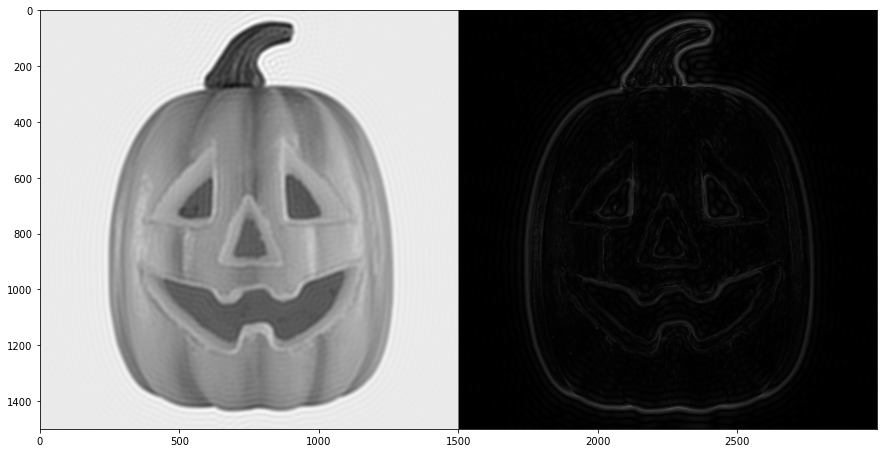

In [13]:
plt.figure(figsize=(15,15))
plt.imshow(np.hstack([np.abs(imgH1),np.abs(imgH2)]), cmap="gray")

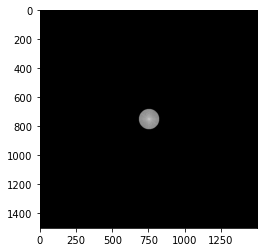

In [26]:
fshift2, fg2 = spectr(imgH1)
plt.imshow(np.abs(fg2), cmap = 'gray')

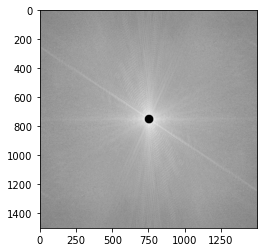

In [30]:
fshift2, fg2 = spectr(imgH2)
plt.imshow(np.abs(fg2),cmap = 'gray')

In [32]:
outImage1 = imgH2.copy()
for i in range (len(imgH2)):
    for j in range (len(imgH2[i])):
        outImage1[i][j]=imgH2[i][j]+imgH1[i][j]

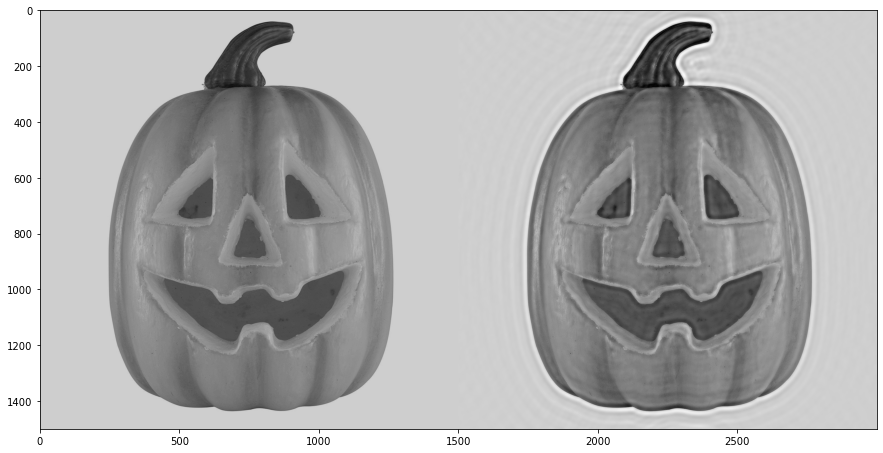

In [33]:
plt.figure(figsize=(15,15))
plt.imshow(np.hstack([img,np.abs(outImage1)]),cmap = 'gray')

In [34]:
def butterworth_low_pass_filter(source, radius=5, order=1):
    # get the paras
    filter_radius = radius
    img = source

    # set paras for filter
    height, weight = img.shape
    center_h = int(height / 2)
    center_w = int(weight / 2)

    # initialize filter
    butterworth_low_pass_filter = np.zeros_like(img)

    # set the pass area
    for i in range(height):
        for j in range(weight):
            dist_from_center = np.sqrt(np.power((i - center_h), 2) + np.power((j - center_w), 2))
            butterworth_low_pass_filter[i][j] = 1 / (1 + np.power(dist_from_center / radius, 2 * order))

    # filter the image
    filtered_img = np.multiply(img, butterworth_low_pass_filter)

    return filtered_img

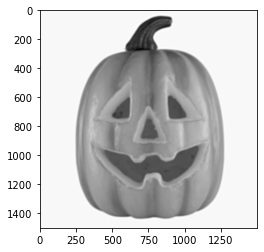

In [35]:
imgButtLow = inv_fourier_trans(butterworth_low_pass_filter(fshift, 80, 2))
plt.imshow(np.abs(imgButtLow), cmap = "gray")

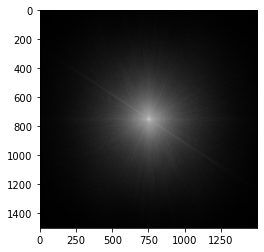

In [36]:
fshift2, fg2 = spectr(imgButtLow)
plt.imshow(np.abs(fg2), cmap = 'gray')

In [37]:
def butterworth_high_pass_filter(source, radius=5, order=2):
    # get the paras
    filter_radius = radius
    img = source

    # set paras for filter
    height, weight = img.shape
    center_h = int(height / 2)
    center_w = int(weight / 2)

    # initialize filter
    butterworth_high_pass_filter = np.zeros_like(img)

    # set the pass area
    for i in range(height):
        for j in range(weight):
            dist_from_center = np.sqrt(np.power((i - center_h), 2) + np.power((j - center_w), 2))
            if dist_from_center != 0:
                butterworth_high_pass_filter[i][j] = 1 / (1 + np.power(radius / dist_from_center, 2 * order))
    # filter the image
    filtered_img = np.multiply(img, butterworth_high_pass_filter)

    return filtered_img

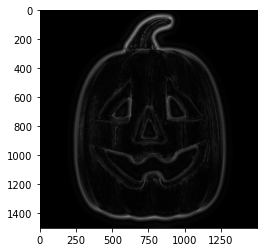

In [38]:
imgButtHigh = inv_fourier_trans(butterworth_high_pass_filter(fshift, 20))
plt.imshow(np.abs(imgButtHigh), cmap = 'gray')

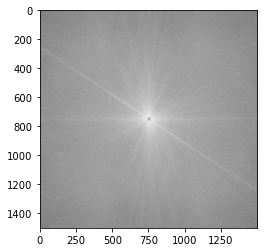

In [40]:
fshift2, fg2 = spectr(imgButtHigh)
plt.imshow(np.abs(fg2),cmap = 'gray')

In [41]:
outImage2 = imgButtHigh.copy()
for i in range (len(imgButtHigh)):
    for j in range (len(imgButtHigh[i])):
        outImage2[i][j]=imgButtHigh[i][j]+imgButtLow[i][j]

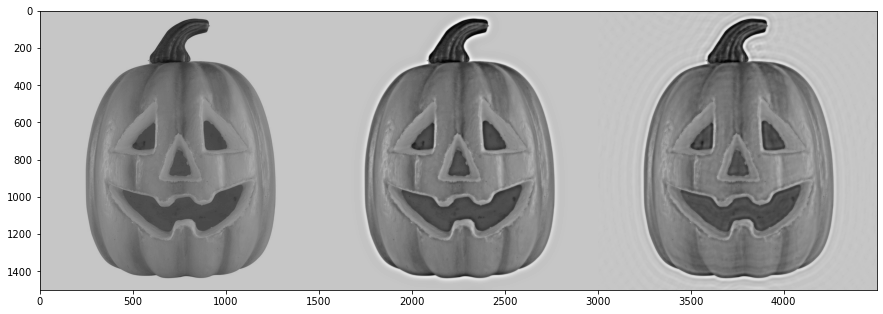

In [42]:
plt.figure(figsize=(15,15))
plt.imshow(np.hstack([img,np.abs(outImage2), np.abs(outImage1)]), cmap='gray')

In [43]:
def guass_low_pass_filter(source, radius=5):
    # get the paras
    filter_radius = radius
    img = source

    # set paras for filter
    height, weight = img.shape
    center_h = int(height / 2)
    center_w = int(weight / 2)

    # initialize filter
    guass_low_pass_filter = np.zeros_like(img)

    # set the pass area
    for i in range(height):
        for j in range(weight):
            dist_from_center = np.sqrt(np.power((i - center_h), 2) + np.power((j - center_w), 2))
            guass_low_pass_filter[i][j] = np.exp(-(np.power(dist_from_center, 2) / np.power(radius, 2)))

    # filter the image
    filtered_img = np.multiply(img, guass_low_pass_filter)

    return filtered_img

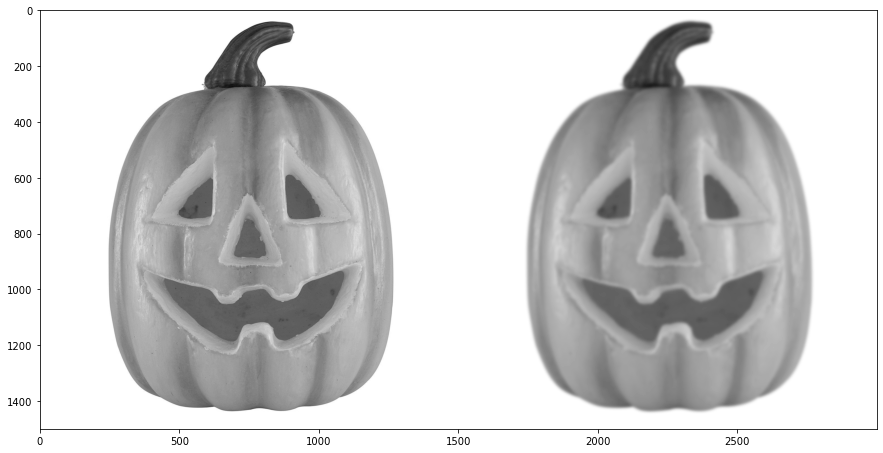

In [44]:
imgGuassLow = inv_fourier_trans(guass_low_pass_filter(fshift, 70))
plt.figure(figsize=(15,15))
plt.imshow(np.hstack([img,np.abs(imgGuassLow)]),cmap='gray')

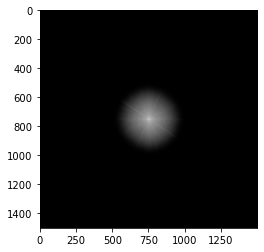

In [45]:
fshift2, fg2 = spectr(imgGuassLow)
plt.imshow(np.abs(fg2), cmap = 'gray')

In [46]:
def guass_high_pass_filter(source, radius = 5):
    # get the paras
    filter_radius = radius
    img = source
    
    # set paras for filter
    height,weight = img.shape
    center_h = int(height/2)
    center_w = int(weight/2)
    
    # initialize filter
    guass_high_pass_filter = np.zeros_like(img)
    
    # set the pass area
    for i in range(height):
        for j in range(weight):
            dist_from_center = np.sqrt(np.power((i-center_h),2) + np.power((j-center_w),2))
            guass_high_pass_filter[i][j] = 1 - np.exp(-(np.power(dist_from_center,2)/np.power(radius,2)))
    
    # filter the image
    filtered_img = np.multiply(img, guass_high_pass_filter)
    
    return filtered_img

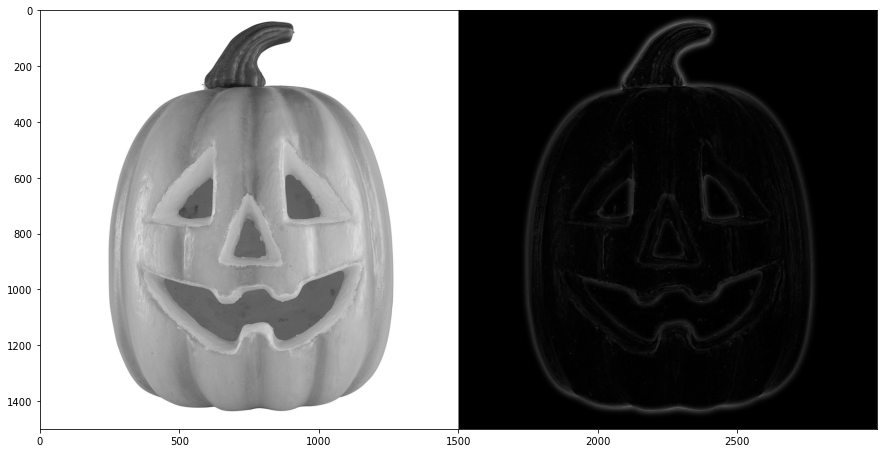

In [47]:
imgGuassHigh = inv_fourier_trans(guass_high_pass_filter(fshift, 30))
plt.figure(figsize=(15,15))
plt.imshow(np.hstack([img,np.abs(imgGuassHigh)]),cmap='gray')

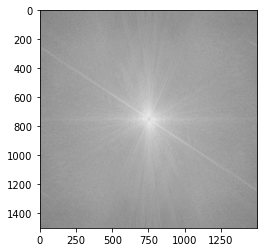

In [50]:
fshift2, fg2 = spectr(imgGuassHigh)
plt.imshow(np.abs(fg2),cmap = 'gray')

In [26]:
outImage3 = imgGuassLow.copy()
for i in range (len(imgGuassHigh)):
    for j in range (len(imgGuassHigh[i])):
        outImage3[i][j]=imgGuassHigh[i][j]+imgGuassLow[i][j]

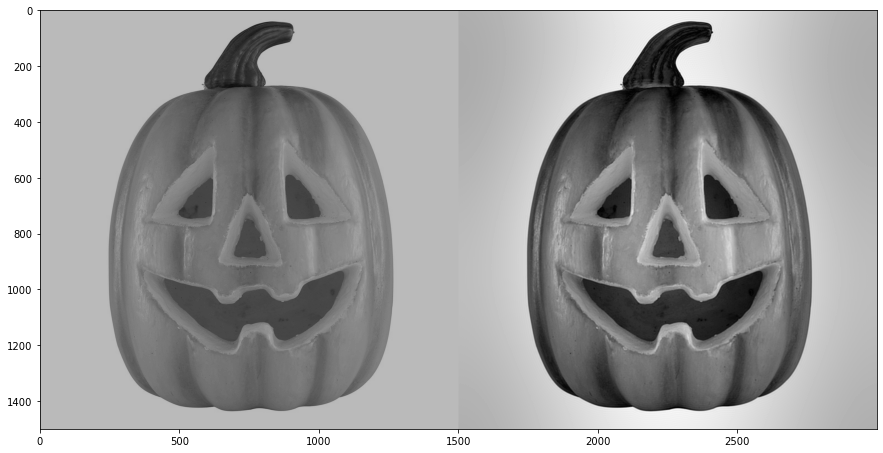

In [27]:
plt.figure(figsize=(15,15))
plt.imshow(np.hstack([img, np.abs(outImage1)]), cmap = 'gray')

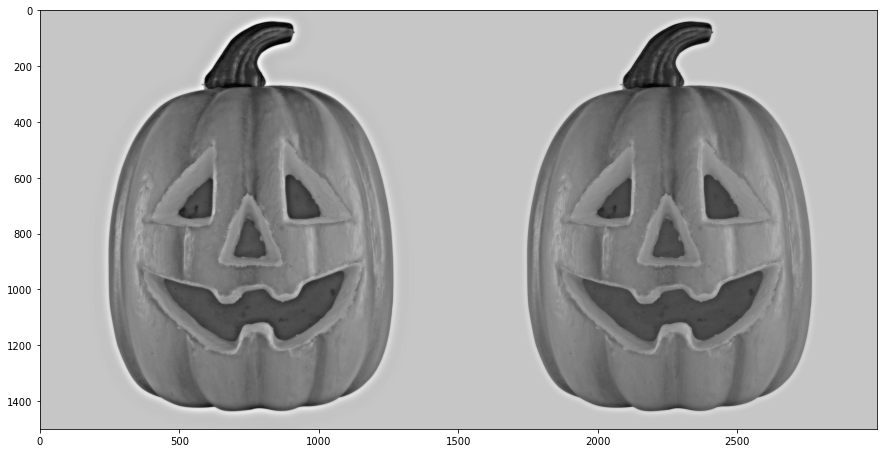

In [28]:
plt.figure(figsize=(15,15))
plt.imshow(np.hstack([np.abs(outImage2),np.abs(outImage3)]), cmap = 'gray')

In [29]:
def specter(src):
    f1 = np.fft.fft2(src)
    fshift1 = np.fft.fftshift(f) #spectrum after fourier transformation and centralization , fft_src
    fg1 = np.log(np.abs(fshift)) #spectrum after log transformation
    return fg1

In [30]:
im1 = specter(np.abs(outImage1))
im2 = specter(np.abs(outImage2))
im3 = specter(np.abs(outImage3))

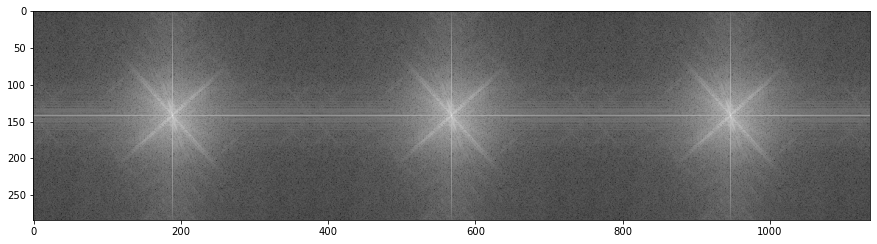

In [28]:
plt.figure(figsize=(15,15))
plt.imshow(np.hstack([im1,im2,im3]),cmap='gray')